Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


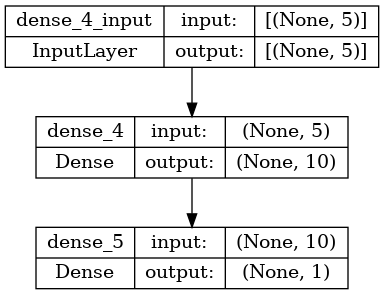

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

model = Sequential([
    Dense(units=10, input_shape=(5,), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.summary()
plot_model(model, to_file='./model.png', show_shapes=True)

In [36]:
# MNIST 구현(DNN 형태 구현)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model

# Raw data Loading (결측치, 이상치, 데이터 불균형 x)
df = pd.read_csv('./data/mnist/train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# 종속변수, 독립변수 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values.reshape(-1, 1)

# train과 test로 데이터 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data,
                 t_data,
                 test_size=0.2,
                 stratify=t_data,
                 random_state=42)

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_train)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 784)]             0         
                                                                 
 FlattenLayer (Flatten)      (None, 784)               0         
                                                                 
 Hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 Hidden_2 (Dense)            (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


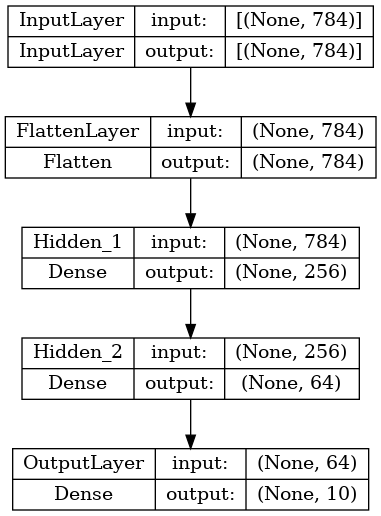

In [38]:
# Model
# Functional API를 이용하기 위해서는 먼저 Input layer부터 정의해야해요!
input_layer = Input(shape=(784,),
                    name='InputLayer')

# 함수 호출하는 것처럼 layer를 연결해요!
x = Flatten(name='FlattenLayer')(input_layer)
x = Dense(units=256,
           activation='relu',
           name='Hidden_1')(x)
x = Dense(units=64,
           activation='relu',
           name='Hidden_2')(x)
x = Dense(units=10,
           activation='softmax',
           name='OutputLayer')(x)

# Model 생성
model = Model(inputs=input_layer,
              outputs=x)

model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

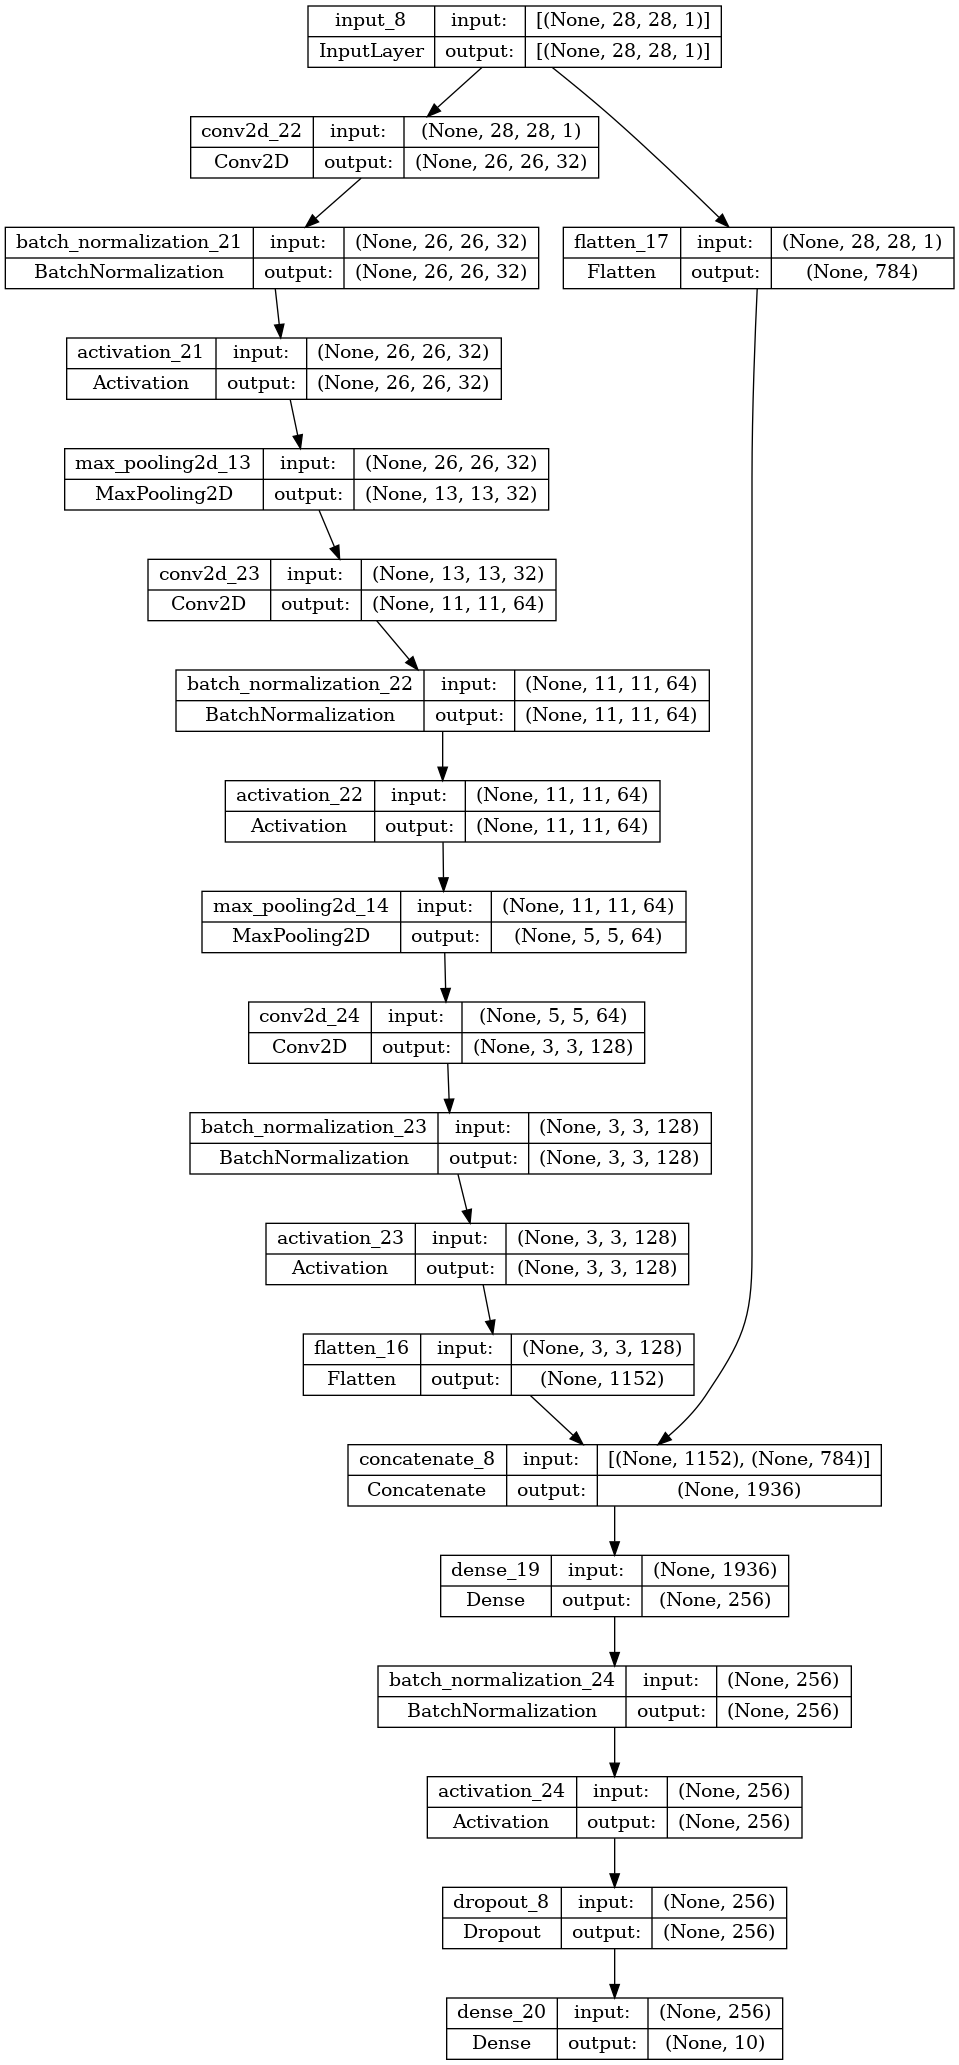

In [39]:
# 다중입력은 아니고 입력된 데이터가 여러 layer로 들어가서
# 다르게 처리되는 예를 하나 보아요!

# MNIST를 구현하는데 DNN 구현방식, CNN 구현방식이 있는데
# 이 두가지를 다 구현해서 그 결과를 합쳐서 학습을 진행
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Concatenate

# Model 구현
# Input Layer
inputs = Input(shape=(28,28,1))

# CNN
conv_1 = Conv2D(filters=32,
                kernel_size=(3,3),
                strides=(1,1))(inputs)
batch_1 = BatchNormalization()(conv_1)
activation_1 = Activation('relu')(batch_1)
pool_1 = MaxPooling2D(pool_size=(2,2))(activation_1)

conv_2 = Conv2D(filters=64,
                kernel_size=(3,3),
                strides=(1,1))(pool_1)
batch_2 = BatchNormalization()(conv_2)
activation_2 = Activation('relu')(batch_2)
pool_2 = MaxPooling2D(pool_size=(2,2))(activation_2)

conv_3 = Conv2D(filters=128,
                kernel_size=(3,3),
                strides=(1,1))(pool_2)
batch_3 = BatchNormalization()(conv_3)
activation_3 = Activation('relu')(batch_3)

flatten_conv = Flatten()(activation_3)

# DNN
flatten = Flatten()(inputs)

# 결과를 합쳐요!
concat = Concatenate()([flatten_conv, flatten])

# Hidden Layer
dense_1 = Dense(units=256)(concat)
batch_1 = BatchNormalization()(dense_1)
activation_1 = Activation('relu')(batch_1)

# Dropout
dropout = Dropout(rate=0.4)(activation_1)

# Output Layer
output = Dense(units=10,
               activation='softmax')(dropout)

model = Model(inputs=inputs,
              outputs=output)

# model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [40]:
# (모델의) 다중출력을 구현해 보아요!
# Sequential Model로는 할 수 없어요. Functional API로는 할 수 있어요!
# 다중분류를 위한 데이터는 준비되어 있어요(x_data, t_data)
# 홀짝을 구분하기 위한 이진분류의 데이터는 준비되어 있지 않아요!
# (x_data는 있는데 t_data)가 없어요! 그래서 t_data부터 만들어야 해요!)
# 위에서 만들어 놓은 t_data가 있어요(0~9까지 숫자가 들어가 있어요)
t_data_odd_train = [] # 짝수는 0, 홀수는 1
for t in t_data_train:
    if t % 2 == 0:
        t_data_odd_train.append(0)
    else:
        t_data_odd_train.append(1)

# print(t_data_train[:5])
# print(np.array(t_data_odd_train).reshape(-1, 1)[:5])
t_data_odd_train = np.array(t_data_odd_train).reshape(-1, 1)

t_data_odd_test = [] # 짝수는 0, 홀수는 1
for t in t_data_test:
    if t % 2 == 0:
        t_data_odd_test.append(0)
    else:
        t_data_odd_test.append(1)

# print(t_data_test[:5])
# print(np.array(t_data_odd_test).reshape(-1, 1)[:5])
t_data_odd_test = np.array(t_data_odd_test).reshape(-1, 1)

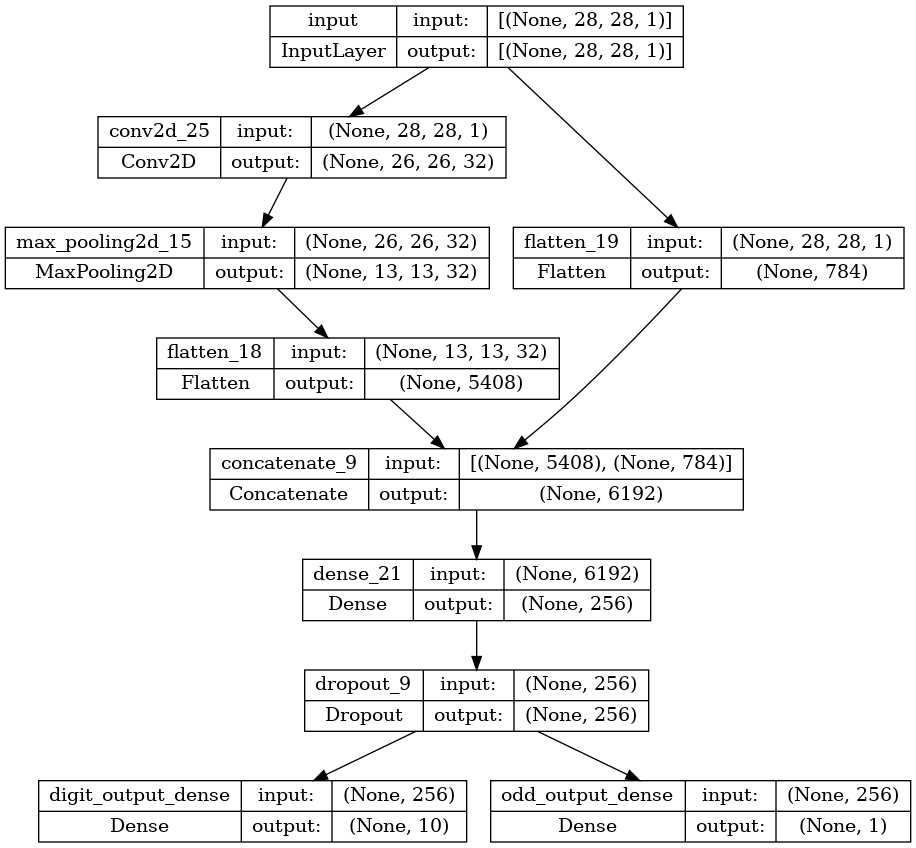

In [41]:
# 다중 출력을 구현하려고 해요!
# 입력은 1개의 입력을 받을거에요!
# 출력이 여러개로 나와야 하니까 label을 추가적으로 생성
# 다중분류(숫자학습) + 이진분류(홀짝학습)
# 출력만 2개로 나오면 되는거니까.. 모델자체는 거의 같이 사용하면 되고
# 학습에서 출력 layer만 다르게 생성해서 사용하면 될 것 같아요!
# 입력(픽셀정보) -> CNN 통과 -> 다중분류 출력
# 입력(픽셀정보) -> 일반 Dense 통과 -> 이진분류 출력

# Model 구현
inputs = Input(shape=(28,28,1),
               name='input')
conv = Conv2D(filters=32,
              kernel_size=(3,3),
              strides=(1,1),
              activation='relu')(inputs)
pool = MaxPooling2D(pool_size=(2,2))(conv)

flatten_conv = Flatten()(pool)
flatten_input = Flatten()(inputs)

concat = Concatenate()([flatten_conv, flatten_input])

dense_1 = Dense(units=256,
                activation='relu')(concat)

dropout = Dropout(rate=0.4)(dense_1)

digit_output = Dense(units=10,
                     activation='softmax',
                     name='digit_output_dense')(dropout)
odd_output = Dense(units=1,
                   activation='sigmoid',
                   name='odd_output_dense')(dropout)

model = Model(inputs=inputs,
              outputs=[digit_output, odd_output])

# model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Model 설정
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss={
                  'digit_output_dense' : 'sparse_categorical_crossentropy',
                  'odd_output_dense' : 'binary_crossentropy'
              },
              metrics=['accuracy'])

# 학습
model.fit(x_data_train_norm.reshape(-1,28,28,1),
          {
              'digit_output_dense' : t_data_train,
              'odd_output_dense' : t_data_odd_train
          },
          epochs=10,
          batch_size=100,
          verbose=1)
# Epoch 10/10
# 336/336 [==============================] - 1s 4ms/step - loss: 0.0308 - 
# digit_output_dense_loss: 0.0190 - odd_output_dense_loss: 0.0118 - 
# digit_output_dense_accuracy: 0.9941 - odd_output_dense_accuracy: 0.9960